<a href="https://colab.research.google.com/github/cauekssouza/Mem-ria/blob/main/Memoria_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install memory_profiler

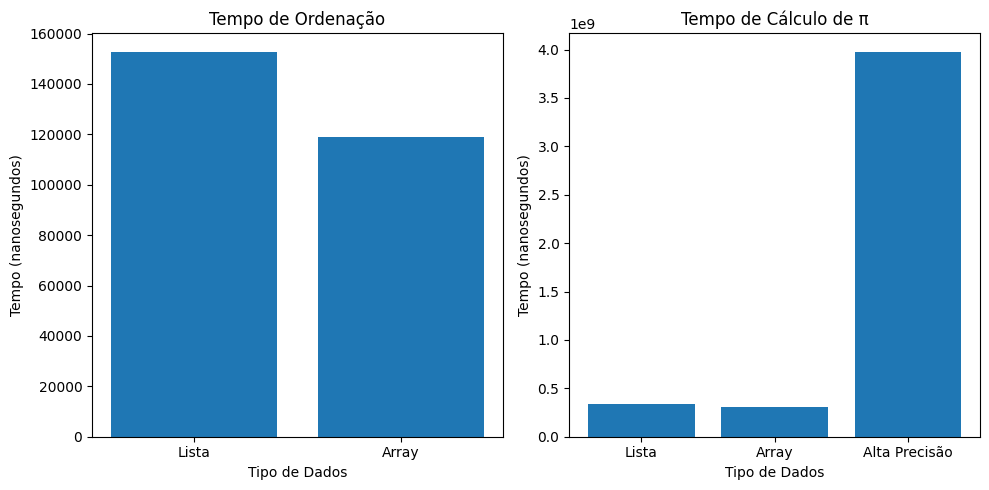

In [32]:
# !pip install memory_profiler
 no Google collab
import numpy as np
import random
import string
import time
import matplotlib.pyplot as plt
import mpmath
import tracemalloc


def create_random_list():
    return [random.choice(string.ascii_letters) for _ in range(1000)]

def create_random_array():
    random_string = ''.join(random.choice(string.ascii_letters) for _ in range(1000))
    return np.array(list(random_string))


def sort_list(lst):
    return sorted(lst)

def sort_array(arr):
    return np.sort(arr)


def measure_time(func, data=None):
    start_time = time.perf_counter_ns()
    if data is None:
        func()
    else:
        func(data)
    end_time = time.perf_counter_ns()
    return end_time - start_time


def calculate_pi(n_terms):
    pi_over_4 = 0
    for n in range(n_terms):
        term = ((-1) ** n) / (2 * n + 1)
        pi_over_4 += term
    return pi_over_4 * 4


def calculate_pi_high_precision(n_terms):
    mpmath.mp.dps = 100
    pi_over_4 = mpmath.mpf(0)
    for n in range(n_terms):
        term = ((-1) ** n) / (2 * n + 1)
        pi_over_4 += term
    return pi_over_4 * 4


random_list = create_random_list()
time_list_sort = measure_time(lambda: sort_list(random_list))
print(f"Tempo de ordenação da lista: {time_list_sort} nanosegundos")


random_array = create_random_array()
time_array_sort = measure_time(lambda: sort_array(random_array))
print(f"Tempo de ordenação do array: {time_array_sort} nanosegundos")

n_terms = 1000000
time_pi_list = measure_time(lambda: calculate_pi(n_terms))
time_pi_array = measure_time(lambda: calculate_pi(n_terms))


time_pi_high_precision = measure_time(lambda: calculate_pi_high_precision(n_terms))


print(f"Tempo de cálculo de π com lista: {time_pi_list} nanosegundos")
print(f"Tempo de cálculo de π com array: {time_pi_array} nanosegundos")
print(f"Tempo de cálculo de π com alta precisão: {time_pi_high_precision} nanosegundos")


time_array_create = measure_time(create_random_array)
print(f"Tempo de criação do array: {time_array_create} nanosegundos")


tracemalloc.start()
random_array = create_random_array()
snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')
for stat in top_stats[:10]:
    print(stat)
tracemalloc.stop()


print("Array com 1000 caracteres aleatórios:")
print(random_array)


pi_high_precision = calculate_pi_high_precision(n_terms)
print("Valor de π calculado com alta precisão:", pi_high_precision)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Lista', 'Array'], [time_list_sort, time_array_sort])
plt.title('Tempo de Ordenação')
plt.xlabel('Tipo de Dados')
plt.ylabel('Tempo (nanosegundos)')

plt.subplot(1, 2, 2)
plt.bar(['Lista', 'Array', 'Alta Precisão'], [time_pi_list, time_pi_array, time_pi_high_precision])
plt.title('Tempo de Cálculo de π')
plt.xlabel('Tipo de Dados')
plt.ylabel('Tempo (nanosegundos)')

plt.tight_layout()
plt.show()
